In [4]:
%matplotlib inline


import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import json

In [5]:
import psycopg2


In [7]:
PATH_CONFIG = '/mnt/data/hnisar/db_config.json'

In [8]:
with open(PATH_CONFIG) as f:
#     print(f.read())
    config = json.load(f)
    

In [9]:
user = config['user']
password = config['password']
db = config['db']
host = config['host']
port = config['port']


In [10]:
conn_str = "host={} dbname={} user={} password={}".format(host, db, user, password)

In [11]:
conn = psycopg2.connect(conn_str)

In [1]:
sql = 'select * from rws_raw.knmi_data;'


In [13]:
df = pd.read_sql(sql, con=conn)

### Change DataType

In [12]:
df.dtypes

STN         float64
YYYYMMDD     object
HH          float64
DD          float64
FH          float64
FF          float64
FX          float64
T           float64
T10         float64
TD          float64
SQ          float64
Q           float64
DR          float64
RH          float64
P           float64
VV          float64
N           float64
U           float64
WW          float64
IX          float64
M            object
R            object
S            object
O            object
Y            object
dtype: object

In [13]:
#date_time
df[['YYYYMMDD']] = df[['YYYYMMDD']].apply(pd.to_datetime)

In [14]:
#Categorical Data
df[['VV','N','WW','IX','M','R','S','O','Y']] = df[['VV','N','WW','IX','M','R','S','O','Y']].astype('category')
df.describe(include=["category"])

,VV,N,WW,IX,M,R,S,O,Y
count,"1,415,800.0000","1,204,106.0000","624,769.0000","2,613,767.0000",1415670,1415669,1415669,1415669,1415670
unique,81.0000,12.0000,50.0000,6.0000,2,2,2,2,2
top,70.0000,8.0000,10.0000,6.0000,False,False,False,False,False
freq,"190,799.0000","613,159.0000","209,628.0000","1,197,908.0000",1362875,1130991,1400498,1405359,1405732


## Wind direction
 Wind direction (in degrees) averaged over the last 10 minutes of the last hour (360 = north, 90 = east, 180 = south, 270 = west, 0 = windless 990 = changeable) See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken

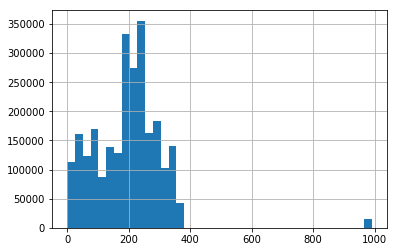

In [13]:
df['DD'][df['DD'].notnull()].hist(bins=39)

In [14]:
df['DD'][df['DD'].notnull()].describe()

count    2.531653e+06
mean     1.962322e+02
std      1.119713e+02
min      0.000000e+00
25%      1.200000e+02
50%      2.100000e+02
75%      2.600000e+02
max      9.900000e+02
Name: DD, dtype: float64

### Hourly average wind speed
Hourly average wind speed (in 0.1 m / s). See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken

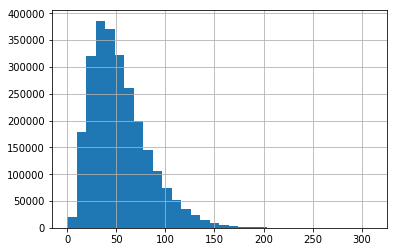

In [15]:
df['FH'][df['FH'].notnull()].hist(bins=32)

In [16]:
df['FH'][df['FH'].notnull()].describe()

count    2.530806e+06
mean     5.040898e+01
std      3.037862e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      7.000000e+01
max      3.100000e+02
Name: FH, dtype: float64

### wind speed
wind speed (in 0.1 m / s) averaged over the last 10 minutes of the last hour

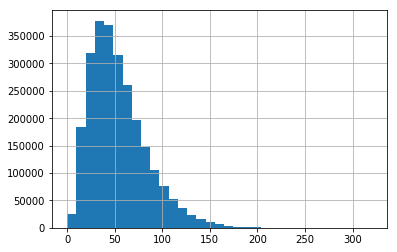

In [17]:
df['FF'][df['FF'].notnull()].hist(bins=33)

In [18]:
df['FF'][df['FF'].notnull()].describe()

count    2.530974e+06
mean     5.051427e+01
std      3.075509e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      7.000000e+01
max      3.200000e+02
Name: FF, dtype: float64

### Hoogste windstoot
??? Hoogste windstoot (in 0.1 m/s) over het afgelopen uurvak;

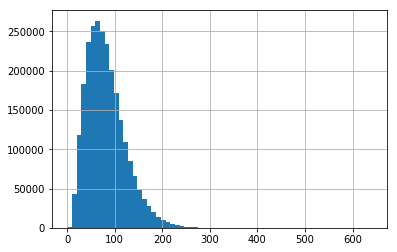

In [19]:
df['FX'][df['FX'].notnull()].hist(bins=65)

In [20]:
df['FX'][df['FX'].notnull()].describe()

count    2.530808e+06
mean     7.782731e+01
std      4.142653e+01
min      0.000000e+00
25%      5.000000e+01
50%      7.000000e+01
75%      1.000000e+02
max      6.400000e+02
Name: FX, dtype: float64

### Temperature
Temperature (in 0.1 degrees Celsius) at 1.50 m altitude during observation

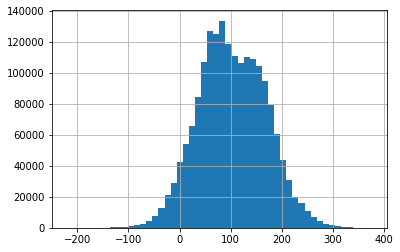

In [21]:
df['T'][df['T'].notnull()].hist(bins=50)

In [22]:
df['T'][df['T'].notnull()].describe()

count    1.855127e+06
mean     1.032013e+02
std      6.603093e+01
min     -2.200000e+02
25%      5.700000e+01
50%      1.000000e+02
75%      1.510000e+02
max      3.760000e+02
Name: T, dtype: float64

### Minimum temperature
Minimum temperature (in 0.1 degrees Celsius) at 10 cm height in the last 6 hours;

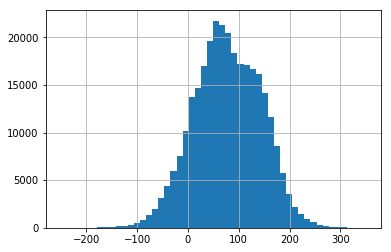

In [23]:
df['T10'][df['T10'].notnull()].hist(bins=50)

In [24]:
df['T10'][df['T10'].notnull()].describe()

count    300291.000000
mean         77.909231
std          65.991226
min        -250.000000
25%          33.000000
50%          77.000000
75%         127.000000
max         349.000000
Name: T10, dtype: float64

### Dew point Temp.
Dew point temperature (in 0.1 degrees Celsius) at 1.50 m altitude during observation;

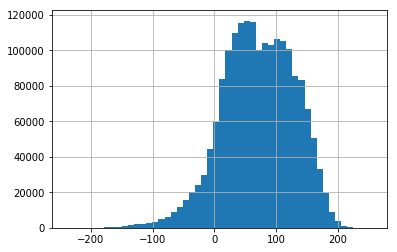

In [25]:
df['TD'][df['TD'].notnull()].hist(bins=50)

In [26]:
df['TD'][df['TD'].notnull()].describe()

count    1.855004e+06
mean     7.092534e+01
std      5.826629e+01
min     -2.380000e+02
25%      3.100000e+01
50%      7.200000e+01
75%      1.160000e+02
max      2.540000e+02
Name: TD, dtype: float64

### Duration of sunshine
Duration of sunshine (in 0.1 hours) per hour section, calculated from global radiation (-1 for <0.05 hours)


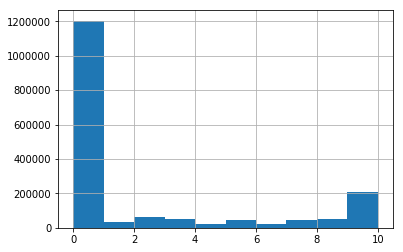

In [27]:
df['SQ'][df['SQ'].notnull()].hist(bins=10)

In [28]:
df['SQ'][df['SQ'].notnull()].describe()

count    1.745979e+06
mean     2.022072e+00
std      3.500227e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      1.000000e+01
Name: SQ, dtype: float64

### Global radiation 
Global radiation (in J / cm^2) per hour section


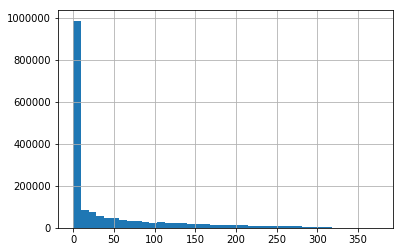

In [39]:
df['Q'][df['Q'].notnull()].hist(bins=40)

In [40]:
df['Q'][df['Q'].notnull()].describe()

count    1.745979e+06
mean     4.280371e+01
std      7.006569e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      5.900000e+01
max      3.740000e+02
Name: Q, dtype: float64

### Duration of precipitation
Duration of precipitation (in 0.1 hour) per hour section


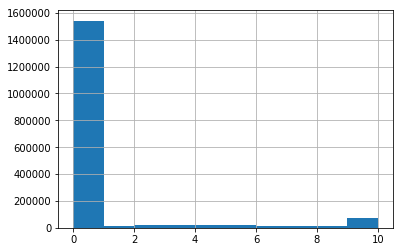

In [31]:
df['DR'][df['DR'].notnull()].hist(bins=10)

In [32]:
df['DR'][df['DR'].notnull()].describe()

count    1.747413e+06
mean     7.422006e-01
std      2.286409e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: DR, dtype: float64

### Hourly of precipitation
Hourly of precipitation (in 0.1 mm) (-1 for <0.05 mm)

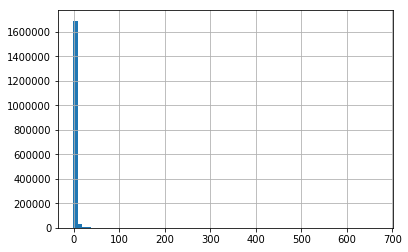

In [52]:
df['RH'][df['RH'].notnull()].hist(bins=70)

In [49]:
df['RH'][df['RH'].notnull()].max()

668.0

### Air pressure
Air pressure (in 0.1 hPa) reduced to sea level, during observation

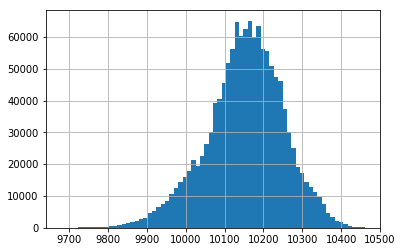

In [62]:
df['P'][df['P'].notnull()].hist(bins=70)

In [54]:
df['P'][df['P'].notnull()].describe()

count    1.303782e+06
mean     1.015234e+04
std      9.948410e+01
min      9.678000e+03
25%      1.009400e+04
50%      1.015800e+04
75%      1.021900e+04
max      1.046200e+04
Name: P, dtype: float64

### Horizontal view during observation
Horizontal view during observation (0 = less than 100m, 1 = 100-200m, 2 = 200-300m, ..., 49 = 4900-5000m, 50 = 5-6km, 56 = 6-7km, 57 = 7-8km, ..., 79 = 29-30km, 80 = 30-35km, 81 = 35-40km, ..., 89 = more than 70km);


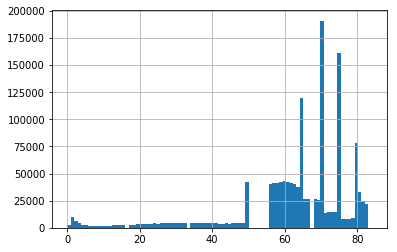

In [64]:
df['VV'][df['VV'].notnull()].hist(bins=89)

### cloud cover
cloud cover (upper air cover in eighth), during observation (9 = upper air invisible);


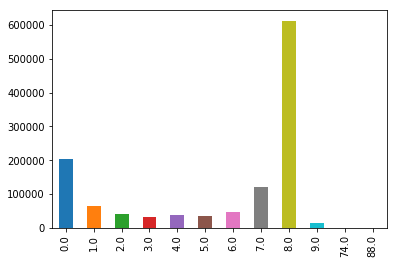

In [100]:
df['N'][df['N'].notnull()].value_counts().sort_index().plot(kind='bar')

In [101]:
df['N'][df['N'].notnull()].describe()

count     1204106.0
unique         12.0
top             8.0
freq       613159.0
Name: N, dtype: float64

### Relative humidity
Relative humidity (in percentages) at 1.50 m altitude during observation


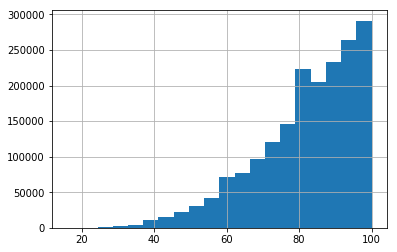

In [109]:
df['U'][df['U'].notnull()].hist(bins=20)

In [110]:
df['U'][df['U'].notnull()].describe()

count    1.855006e+06
mean     8.175698e+01
std      1.387438e+01
min      1.600000e+01
25%      7.400000e+01
50%      8.500000e+01
75%      9.300000e+01
max      1.000000e+02
Name: U, dtype: float64

### Weather code
Weather code (00-99), visual (WW) or automatic (WaWa) observed, for the current weather or the weather in the past hour. See http://bibliotheek.knmi.nl/scholierenpdf/weercodes_Nederland


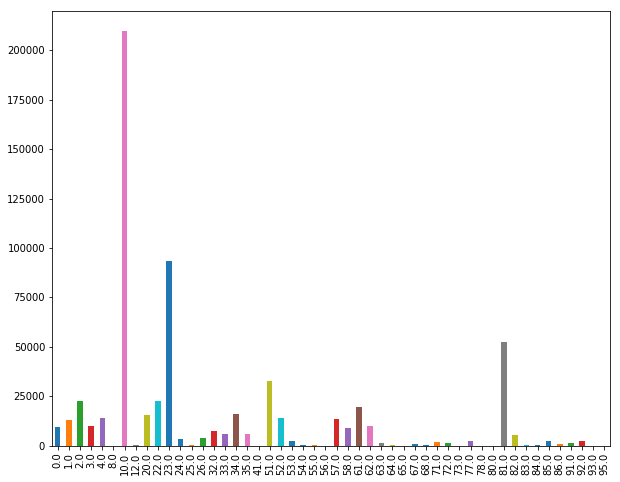

In [121]:
df['WW'][df['WW'].notnull()].value_counts().sort_index().plot(kind='bar',figsize=(10,8))

In [126]:
df['WW'][df['WW'].notnull()].value_counts().sort_index()

0.0       9538
1.0      12853
2.0      22300
3.0       9954
4.0      14167
8.0          2
10.0    209628
12.0       338
20.0     15367
22.0     22375
23.0     93472
24.0      3141
25.0       317
26.0      3658
32.0      7307
33.0      5949
34.0     15745
35.0      5659
41.0         2
51.0     32864
52.0     13810
53.0      2206
54.0       177
55.0        56
56.0         3
57.0     13232
58.0      9047
61.0     19362
62.0      9900
63.0      1158
64.0       156
65.0         2
67.0       778
68.0       488
71.0      1589
72.0      1075
73.0        15
77.0      2093
78.0         5
80.0         6
81.0     52232
82.0      5420
83.0       442
84.0        45
85.0      2555
86.0       554
91.0      1377
92.0      2340
93.0         6
95.0         4
Name: WW, dtype: int64

In [115]:
df['WW'][df['WW'].notnull()].describe()

count     624769.0
unique        50.0
top           10.0
freq      209628.0
Name: WW, dtype: float64

### Weather code indicator
Weather code indicator for the way of observing on a manned or automatic station (1 = manned using code from visual observations, 2,3 = manned and omitted (no significant weather phenomenon, no data), 4 = automatic and recorded (using code from visual observations), 5.6 = automatic and omitted (no significant weather phenomenon, no data), 7 = automatic using code from automatic observations)

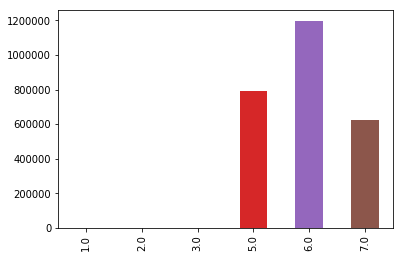

In [123]:
df['IX'][df['IX'].notnull()].value_counts().sort_index().plot(kind='bar')

In [125]:
df['IX'][df['IX'].notnull()].value_counts().sort_index()

1.0          5
2.0          6
3.0         30
5.0     789990
6.0    1197908
7.0     625828
Name: IX, dtype: int64

In [124]:
df['IX'][df['IX'].notnull()].describe()

count     2613767.0
unique          6.0
top             6.0
freq      1197908.0
Name: IX, dtype: float64

## Mist, Rain, Snow, Thunderstorm, Ice

Text(0.5,1,'Ice')

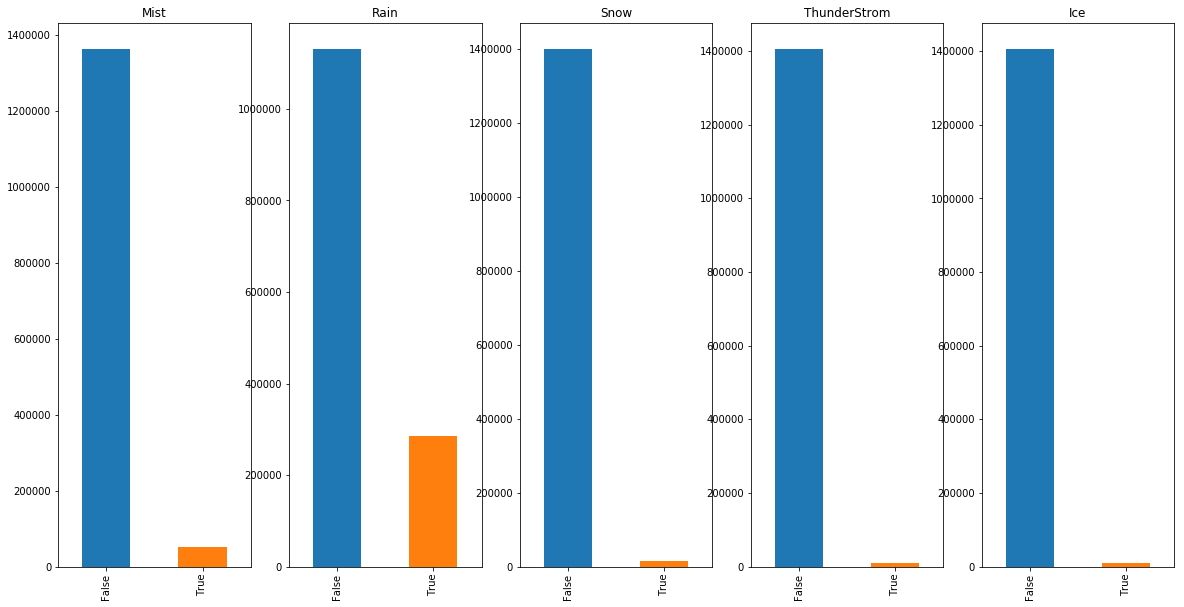

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,10))

df['M'].value_counts().plot(kind='bar',subplots=True,ax=axes[0]); axes[0].set_title('Mist')
df['R'].value_counts().plot(kind='bar',subplots=True,ax=axes[1]); axes[1].set_title('Rain')
df['S'].value_counts().plot(kind='bar',subplots=True,ax=axes[2]); axes[2].set_title('Snow')
df['O'].value_counts().plot(kind='bar',subplots=True,ax=axes[3]); axes[3].set_title('ThunderStrom')
df['Y'].value_counts().plot(kind='bar',subplots=True,ax=axes[4]); axes[4].set_title('Ice')


In [18]:
gb = df.groupby(['STN'])
gb.agg({'YYYYMMDD' : [np.min, np.max]})

YYYYMMDD           
            amin       amax
STN                        
209.0 2012-01-01 2018-04-16
210.0 2012-01-01 2016-05-02
215.0 2014-07-15 2018-04-16
225.0 2012-01-01 2018-04-16
235.0 2012-01-01 2018-04-16
240.0 2012-01-01 2018-04-16
242.0 2012-01-01 2018-04-16
248.0 2012-01-01 2018-04-16
249.0 2012-01-01 2018-04-16
251.0 2012-01-01 2018-04-16
257.0 2012-01-01 2018-04-16
258.0 2012-01-01 2018-04-16
260.0 2012-01-01 2018-04-16
267.0 2012-01-01 2018-04-16
269.0 2012-01-01 2018-04-16
270.0 2012-01-01 2018-04-16
273.0 2012-01-01 2018-04-15
275.0 2012-01-01 2018-04-15
277.0 2012-01-01 2018-04-15
278.0 2012-01-01 2018-04-15
279.0 2012-01-01 2018-04-15
280.0 2012-01-01 2018-04-15
283.0 2012-01-01 2018-04-15
285.0 2012-01-01 2018-04-15
286.0 2012-01-01 2018-04-15
290.0 2012-01-01 2018-04-15
308.0 2012-01-01 2018-04-15
310.0 2012-01-01 2018-04-15
311.0 2012-01-01 2016-08-15
312.0 2012-01-01 2018-04-15
313.0 2012-01-01 2018-04-15
315.0 2012-01-01 2018-04-15
316.0 2012-01-01 2018-04-15
319.0 2012-01-01 2018-04-15
323.0 2012-01-01 2018-04-15
324.0 2012-01-01 2018-04-15
330.0 2012-01-01 2018-04-15
331.0 2012-01-01 2018-04-15
340.0 2012-01-01 2018-04-15
343.0 2012-01-01 2018-04-15
344.0 2012-01-01 2018-04-15
348.0 2012-01-01 2018-04-15
350.0 2012-01-01 2018-04-15
356.0 2012-01-01 2018-04-15
370.0 2012-01-01 2018-04-15
375.0 2012-01-01 2018-04-15
377.0 2012-01-01 2018-04-15
380.0 2012-01-01 2018-04-15
391.0 2012-01-01 2018-04-15

# Location of KNMI stations

In [22]:
sql_stn = 'select * from rws_schema.knmi_station;'
df_stn = pd.read_sql(sql_stn, con=conn)

In [16]:
df_stn.describe()

,STN,LON(east),LAT(north),ALT(m)
count,50.0000,50.0000,50.0000,50.0000
mean,295.2400,5.0341,52.1554,8.7900
std,47.2218,0.9962,0.6753,18.8954
min,209.0000,3.2420,50.9060,-4.3000
25%,261.2500,4.3202,51.5368,0.0000
50%,285.5000,4.9575,52.0845,1.3000
75%,328.5000,5.7595,52.6415,11.6250
max,391.0000,7.1500,53.5750,114.3000


In [23]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.ops import nearest_points

In [24]:
geometry = [Point(xy) for xy in zip(df_stn["LON(east)"], df_stn["LAT(north)"])]
crs = {'init': 'epsg:4326'} #Coordinate reference system
gdf = GeoDataFrame(df_stn, crs=crs, geometry=geometry)

In [14]:
sql_stn = 'select * from rws_schema.ongevallen;'
df_ong = pd.read_sql(sql_stn, con=conn)

In [63]:
import folium
map_stn = folium.Map(location=[52.155380,5.034120],tiles='Stamen Toner')

In [64]:
##Put some markers on the map
num_stations = [row for row in df_stn['STN']]
lat_stations = [row for row in df_stn['LAT(north)']]
lon_stations = [row for row in df_stn['LON(east)']]
name_stations = [row for row in df_stn['NAME']]

In [65]:
epsilon = 1e-13# just to offset an error 
for i in range(len(num_stations)):

        folium.CircleMarker([lat_stations[i], lon_stations[i]], \
                  popup=''+str(num_stations[i]), radius=3.0).add_to(map_stn)
   
   

In [66]:
map_stn

### Missing Data
It seems like most of missing data in "Rain" column have very low precipitation value.

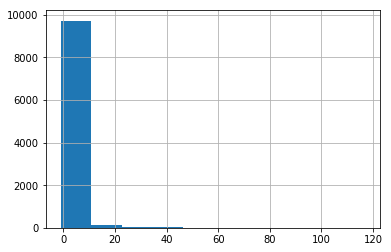

In [29]:
df['RH'][df['R'].isnull()].head(10000).hist()

In [ ]:
# Sun VS Time (Weekly, Monthly) #For most of variables

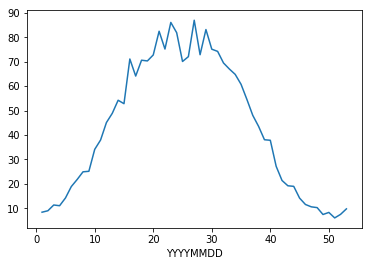

In [180]:
df['Q'].groupby(df['YYYYMMDD'].dt.week).mean().plot()

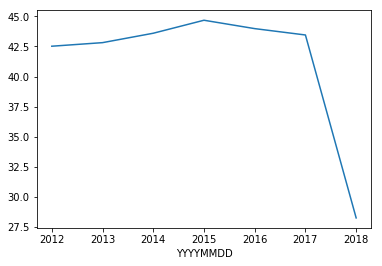

In [183]:
df['Q'].groupby(df['YYYYMMDD'].dt.year).mean().plot()

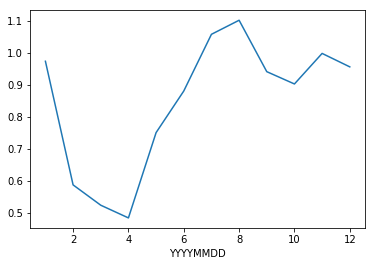

In [182]:
#Rain Vs Time
df['RH'].groupby(df['YYYYMMDD'].dt.month).mean().plot()

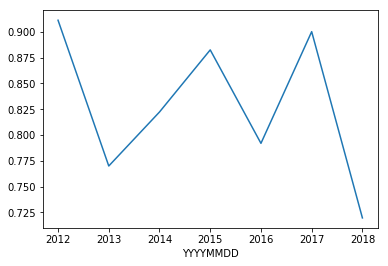

In [184]:
#Rain Vs Time
df['RH'].groupby(df['YYYYMMDD'].dt.year).mean().plot()

# missing data

In [254]:
# Note that some station did not collect the 'SQ' data at all
df['SQ'].where(df['SQ']>0).groupby(df['STN']).count()

STN
209.0        0
210.0    11945
215.0    10342
225.0        0
235.0    17823
240.0    17353
242.0        0
248.0        0
249.0    17622
251.0    17732
257.0    17214
258.0        0
260.0    16860
267.0    17637
269.0    16991
270.0    17479
273.0    17283
275.0    16444
277.0    17147
278.0    16852
279.0    16922
280.0    16882
283.0    16813
285.0        0
286.0    17054
290.0    16723
308.0        0
310.0    17663
311.0        0
312.0        0
313.0        0
315.0        0
316.0        0
319.0    17287
323.0     6027
324.0        0
330.0    17213
331.0        0
340.0        0
343.0        0
344.0    17177
348.0    17401
350.0    17231
356.0    17195
370.0    17214
375.0    17053
377.0    17086
380.0    16581
391.0    16720
Name: SQ, dtype: int64

In [290]:
df[df[['DD','FH']].isnull() ].head(1000)


KeyboardInterrupt



In [316]:
#Note: there are 26593 rows without these informative attributes, 
#we can just drop them....
df[df[['DD','FH','FF','FX','T','T10','TD','SQ','Q',\
    'DR','RH','P','VV','N','U','WW','M','R','S','O','Y']].isnull().all(axis=1)].shape

(26593, 25)

In [317]:
#Percentage of missing data in each col
df.isnull().sum()/df.shape[0]

STN        0.0000
YYYYMMDD   0.0000
HH         0.0000
DD         0.0314
FH         0.0317
FF         0.0317
FX         0.0317
T          0.2902
T10        0.8851
TD         0.2903
SQ         0.3320
Q          0.3320
DR         0.3315
RH         0.3315
P          0.5012
VV         0.4583
N          0.5393
U          0.2903
WW         0.7610
IX         0.0000
M          0.4584
R          0.4584
S          0.4584
O          0.4584
Y          0.4584
dtype: float64

In [312]:
# Note that T10 is recorded very 6 hours; we will have to clean this.
df['T10'].head(20)

0         nan
1         nan
2         nan
3         nan
4         nan
5    101.0000
6         nan
7         nan
8         nan
9         nan
10        nan
11   109.0000
12        nan
13        nan
14        nan
15        nan
16        nan
17   116.0000
18        nan
19        nan
Name: T10, dtype: float64

### Animation overtime

In [201]:
#from matplotlib import animation as animation
from folium import plugins

In [225]:
df_w_loc=pd.merge(df, df_stn, on='STN', how='left')

In [466]:
df_w_loc['R'] = df_w_loc['R'][df_w_loc['R'].notnull()].astype(int)

In [490]:
df_w_loc['R']*=100

In [491]:
rain_timelaspe=df_w_loc[['YYYYMMDD','HH','LAT(north)','LON(east)','R']][df_w_loc['R'].notnull()]\
                       .groupby(['YYYYMMDD','HH'])
group_list = list(rain_timelaspe.groups.keys())
#Gen list for heat map
data_list = list()
for group in group_list:
    data_list.append(\
               rain_timelaspe.get_group(group)[['LAT(north)','LON(east)','R']]\
              .values.tolist()\
                    )

In [492]:
idx_list = [str(group[0])[:11]+str(group[1]) for group in group_list] 

In [493]:
m = folium.Map([52.155380,5.034120], tiles='stamentoner', zoom_start=6)
plugins.HeatMapWithTime(data_list[2000:3000],index=idx_list[2000:3000]\
                        ,use_local_extrema=True
                        ,radius=15).add_to(m)


In [494]:
m